In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_palette('pastel')
%matplotlib inline


### Business Goal:
A business manager of a consumer credit card portfolio is facing the problem of customer attrition. They want to analyze the data to find out:
- The reason of customer attrition.

#### EDA Framework: 
- What sort of assumptions have you formed about the data?
- Which attributes seem promising for further analysis?
- Have your explorations revealed new characteristics about the data?
- How have these explorations changed your initial hypothesis?
- Can you identify particular subsets of data for later use?
- Take another look at your data mining goals. Has this exploration altered the goals?
        
### Meaning of the features: 
   - Credit limits: The maximum amount of money a lender will allow a consumer to spend using a credit card.
   - Months on book: Period of relationship with bank.
   - Total_Relationship_Count: Total no. of products held by the customer.
   - Months_Inactive: No. of months inactive in the last 12 months.
   - Contacts_Count_12_mon: No. of Contacts in the last 12 months.
   - Total_Revolving_Bal:  Total revolving balance is the sum of portions of credit card spending that goes unpaid at the end of a billing cycle.
   - Avg_Open_To_Buy: The amount of credit available at a averaged in a year on a credit card holder's account.
   - Total_Amt_Chng_Q4_Q1: Change in Transaction Amount from Q4-Q1.
   - Total_Trans_Amt: Total Transaction Amount. (Last 12 months)    
   - Total_Trans_Ct: Total Transaction Count. (Last 12 months)
   - Total_Ct_Chng_Q4_Q1: Change in Transaction Count. (Q4 over Q1)
   - Avg_Utilization_Ratio: Credit card debt/ Credit card limits.


### Get the data

In [242]:
data = pd.read_csv(r'C:\Projects\Credit_Card_Project\BankChurnersdata.csv', encoding='utf8', header='infer')
data = data.drop(labels=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1)
data.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### Check for NaN, check for duplicates, check for data types.

In [243]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [244]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [245]:
cat_features = ['Attrition_Flag', 'Gender', 'Income_Category','Card_Category']
for i in cat_features:
    print(data[i].value_counts())

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
F    5358
M    4769
Name: Gender, dtype: int64
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


#### There are categorical features that should be process for further analysis, such as: 
- Attrition_Flag
- Gender
- Income_Category
- Card_Category (but for the sake of convenience in the EDA process, these features will be kept as it is.)

There is no duplicated rows in the dataset. There is also no same client who have the same CLIENTNUM in the dataset.

### Functions for later use:

In [246]:
def plot_dist_features (feature_name,kind='hist'):
    fig = plt.figure(figsize=(12,7))
    ax = fig.add_axes()
    sns.displot(data[feature_name], ax=ax, bins=20,kind=kind)
    plt.xlabel(feature_name)
    plt.xticks(rotation=45)
    plt.title('Distribution of {feature_name}'.format(feature_name=feature_name))
    plt.show()

def plot_box_plot(feature_name,):
    fig = plt.figure(figsize=(12,7))
    ax = fig.add_axes()
    sns.boxplot(y= data[feature_name], ax=ax)
    plt.title('Boxplot of {feature_name}'.format(feature_name=feature_name))
    plt.show()
    
def plot_ratio_attrition_rate(feature,data=data):
    plt.figure(figsize=(12,7))
    groupby = pd.DataFrame(data.groupby([feature,'Attrition_Flag']).count().iloc[:,1])
    groupby = groupby[groupby.columns[0]]/data.groupby(feature).count().iloc[:,1]
    groupby.unstack().plot(kind='bar',figsize=(12,7))
    plt.title('Rate of attrition between different {feature}.'.format(feature=feature))
    plt.xticks(rotation=60)
    
def pair_plot_to_attritionflag (feat1, feat2, data=data, hue='Attrition_Flag'):
    plt.figure(figsize=(12,7))
    sns.scatterplot(x=feat1, y= feat2, data=data, hue=hue)
    plt.title('Scatterplot of {feat1} and {feat2} with hue of {hue}'.format(feat1=feat1, feat2=feat2, hue=hue))
    plt.show()

def plot_binned_category(feature,bin):
    data_prep = data.copy()
    data_prep['{feature}'.format(feature=feature)] = pd.cut(data_prep[feature],bins=bin)
    plot_ratio_attrition_rate(feature=feature,data=data_prep)

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df.corr())
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

### Distributions of each data feature.

<Figure size 864x504 with 0 Axes>

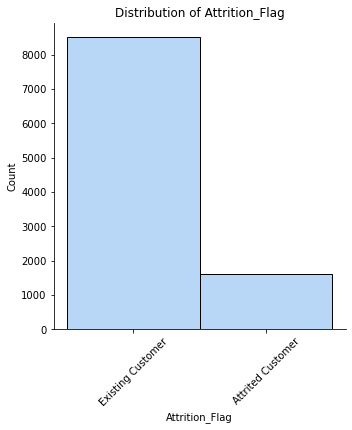

In [247]:
plot_dist_features('Attrition_Flag')

- Clearly the amount of Existing customers far surpassed the Attrited Customers.
- This would make the Machine Learning predictions for attrited customers hard since the dataset is imbalanced. (further analysis with machine learning might have to take considerations in trying to balance the dataset)

<Figure size 864x504 with 0 Axes>

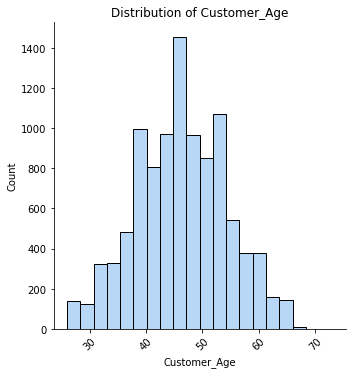

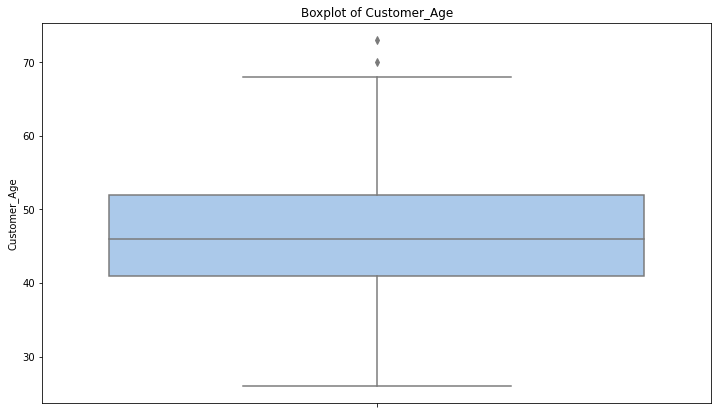

In [248]:
plot_dist_features('Customer_Age')
plot_box_plot('Customer_Age')

- Customer age seems to follow normal distribution. There are some outliers according to IQR rule.  

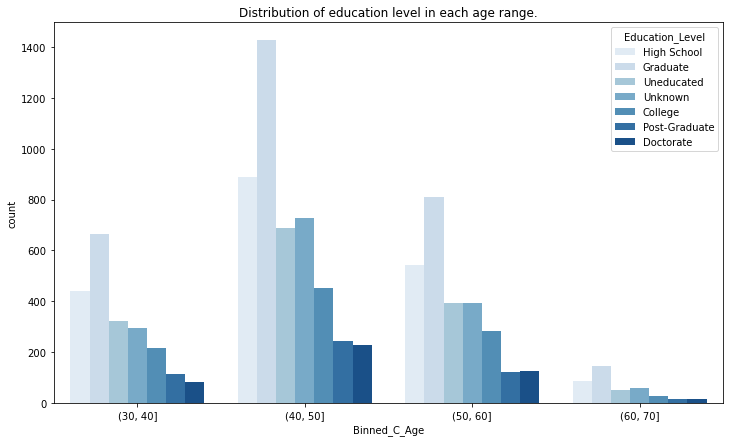

In [249]:
plt.figure(figsize=(12,7))
data['Binned_C_Age'] = pd.cut(data['Customer_Age'],bins=[30,40,50,60,70])
sns.countplot(x=data['Binned_C_Age'], hue=data['Education_Level'],palette='Blues')

plt.title('Distribution of education level in each age range.')
plt.show()


- Customers are mainly in their 40-50s.
- There are surprisingly little people below 30 years old. 
- Most people are graduates. Second-most are people with highschool degrees. 

<Figure size 864x504 with 0 Axes>

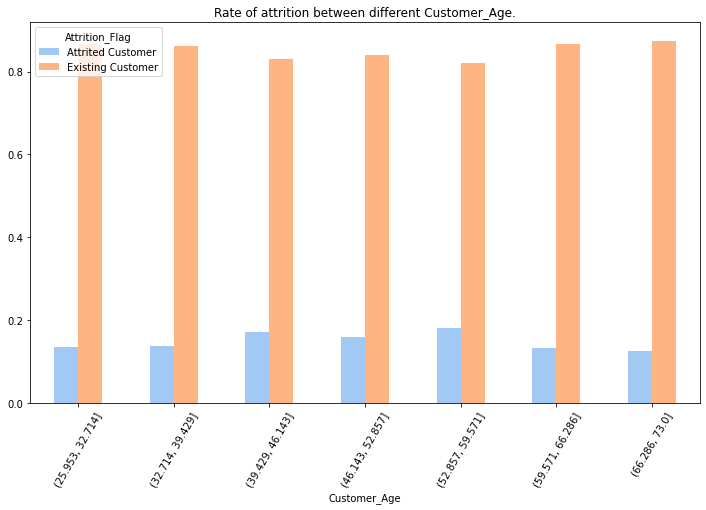

In [254]:
plot_binned_category(feature='Customer_Age', bin = 7)

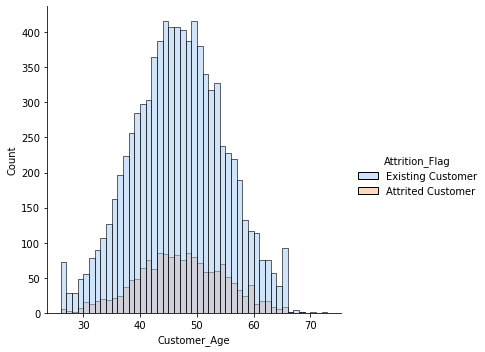

In [ ]:
sns.displot(x = 'Customer_Age', data=data, hue='Attrition_Flag')

The attrition rate between different age groups do not have much difference.

<Figure size 864x504 with 0 Axes>

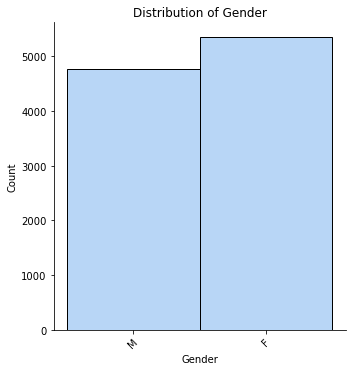

In [ ]:
plot_dist_features('Gender')

- Approximately equal size of Male and Female in the dataset. (With the slight edge to Female)

<Figure size 864x504 with 0 Axes>

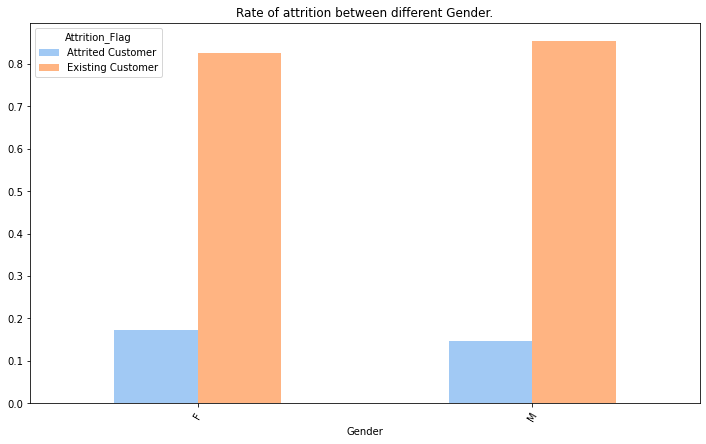

In [ ]:
plot_ratio_attrition_rate('Gender')

- Between male and female, there isn't much of a difference of attrition rate. To make sure, we have to perform hypothesis testing.

<Figure size 864x504 with 0 Axes>

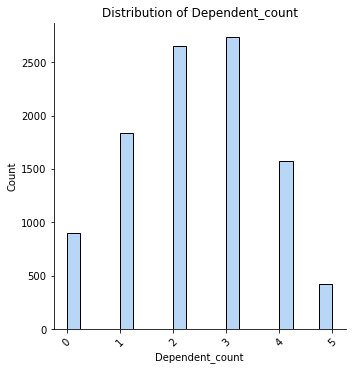

In [ ]:
plot_dist_features('Dependent_count')

- People mostly have from 2-3 dependents.

In [ ]:
data['Credit_Limit'].value_counts()

34516.0    508
1438.3     507
15987.0     18
9959.0      18
23981.0     12
          ... 
3891.0       1
19354.0      1
34427.0      1
14527.0      1
8206.0       1
Name: Credit_Limit, Length: 6205, dtype: int64

<Figure size 864x504 with 0 Axes>

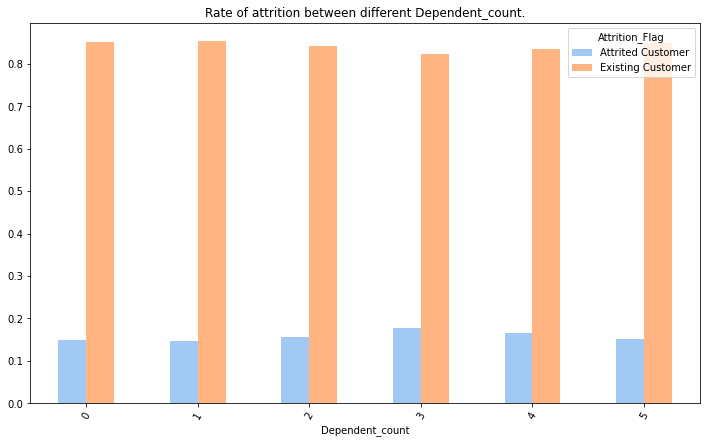

In [ ]:
plot_ratio_attrition_rate('Dependent_count')

There is also not much difference between people with many dependents and people with few dependents. 

Text(0.5, 1.0, 'Changes in dependent count with different age groups.')

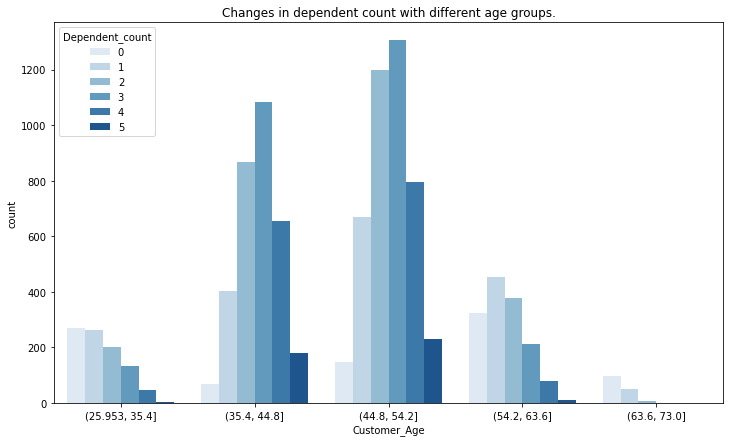

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(data=data, x=pd.cut(data['Customer_Age'],bins=5),hue='Dependent_count',palette="Blues")
plt.title('Changes in dependent count with different age groups.')

- Young people do not have dependents. When people in their 30s to 50s, they have high dependent count, but after that, they gradually getting older and have less people depending on them. 

<Figure size 864x504 with 0 Axes>

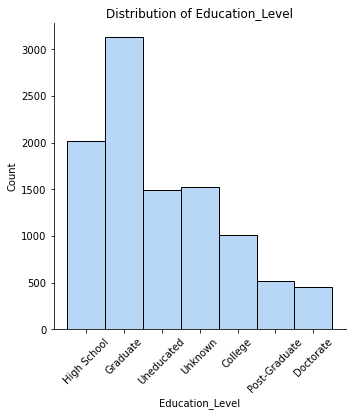

In [ ]:
plot_dist_features('Education_Level')

- There are suprisingly alot of people who are only completed highschool.
- Is this distribution level of education affects the amount spent with credit card


<Figure size 864x504 with 0 Axes>

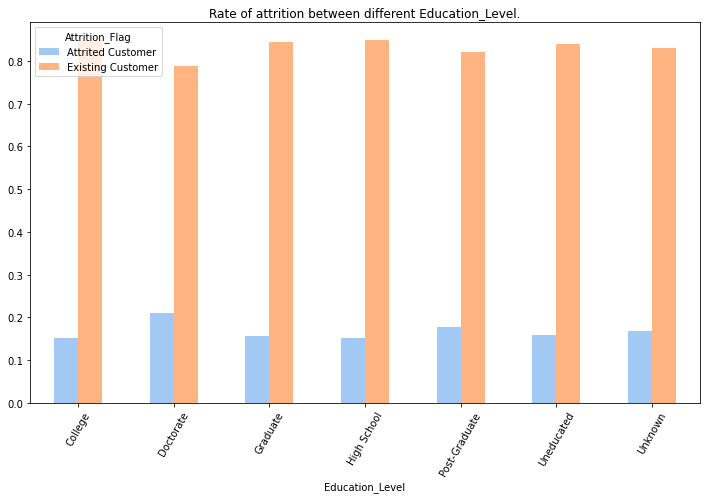

In [ ]:
plot_ratio_attrition_rate('Education_Level')

No difference between education levels in attrition rate. 

<Figure size 864x504 with 0 Axes>

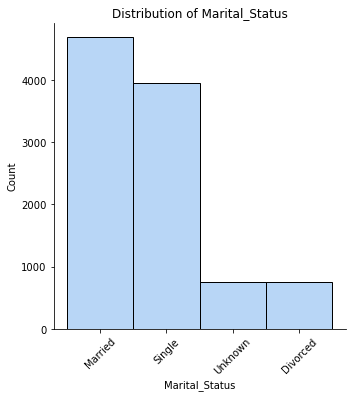

In [ ]:
plot_dist_features('Marital_Status')

- Most people are married or single.
- Not many claimed their marital status is unknown or divorced.

<Figure size 864x504 with 0 Axes>

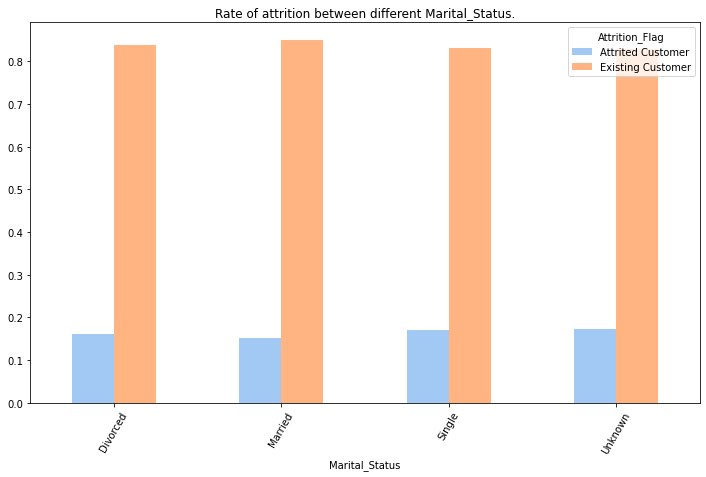

In [ ]:
plot_ratio_attrition_rate('Marital_Status')

The difference in rate of attrition between different marital status is small. 

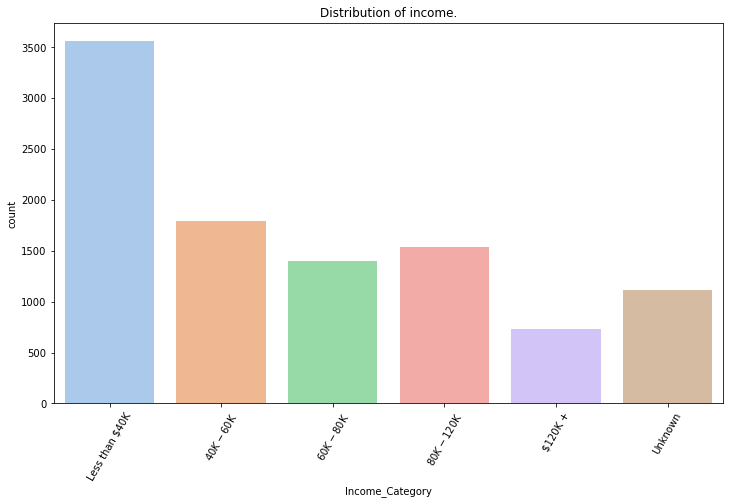

In [ ]:
plt.figure(figsize=(12,7))
sns.countplot(data['Income_Category'],order=['Less than $40K','$40K - $60K','$60K - $80K','$80K - $120K','$120K +','Unknown'])
plt.xticks(rotation = 60)
plt.title('Distribution of income.')
plt.show()

- The distribution right-skewed.
- People mainly have their income below $60K. 

<Figure size 864x504 with 0 Axes>

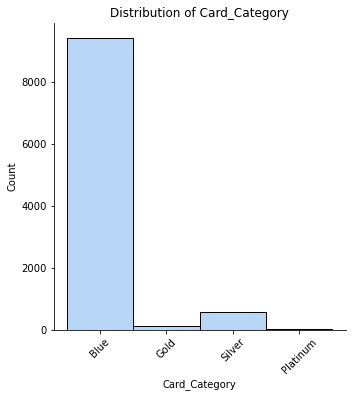

In [ ]:
plot_dist_features('Card_Category')

- The higher the level of card category, the fewer the users that use them. 

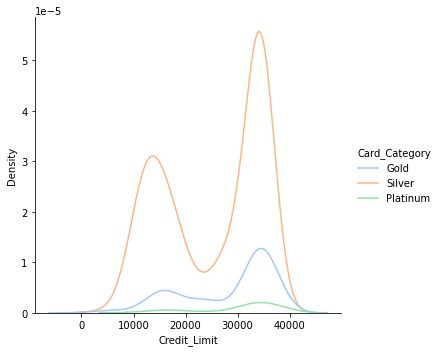

In [ ]:
sns.displot(x='Credit_Limit', hue='Card_Category',data=data.drop((data[data['Card_Category']=='Blue']).index),kind='kde')

<Figure size 864x504 with 0 Axes>

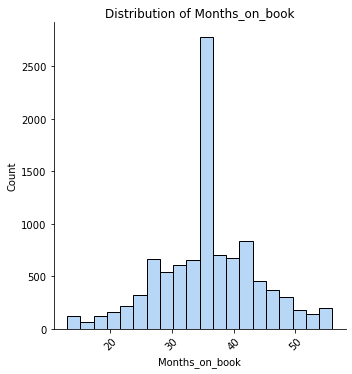

In [ ]:
plot_dist_features('Months_on_book')

- Surprising amount of people that started using the credit card at the same time and still remain active (at 36 months). This suggests that there is a good month that earned a lot of customers in the past or there is some adjustments need to be made in data collecting process.

<Figure size 864x504 with 0 Axes>

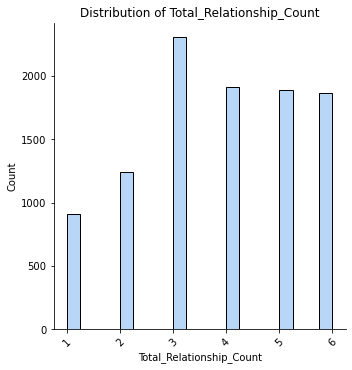

In [ ]:
plot_dist_features('Total_Relationship_Count')

- Not really following a particular trend/distribution. 
- People who use 4-6 services seems to have the same amount, maybe there are a group of 3 services that need to be subscribed together. 

<Figure size 864x504 with 0 Axes>

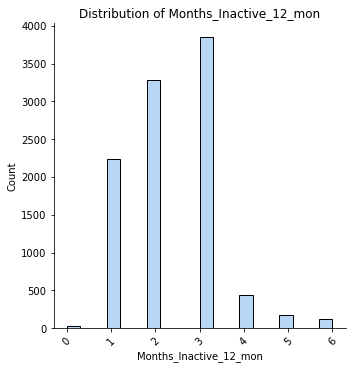

In [ ]:
plot_dist_features('Months_Inactive_12_mon')

- Majority has 1,2,3 months of inactivity. 

<Figure size 864x504 with 0 Axes>

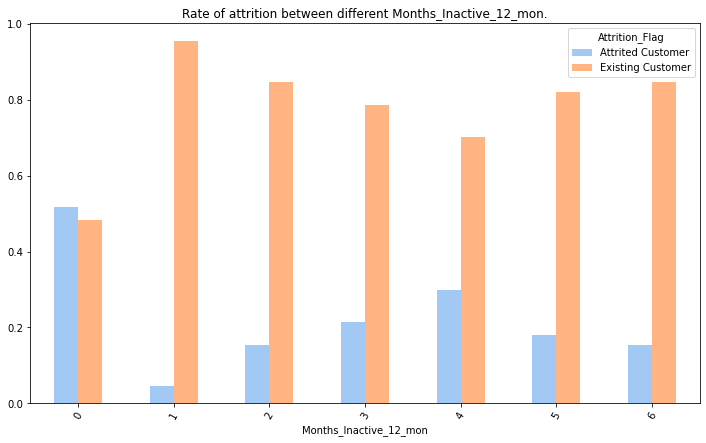

In [ ]:
plot_ratio_attrition_rate('Months_Inactive_12_mon')

From 1-4 inactive months, the attrition rate increase the more months the customers being inactive. But afterwards the rate decreases (maybe due to customers have low card usage)

<Figure size 864x504 with 0 Axes>

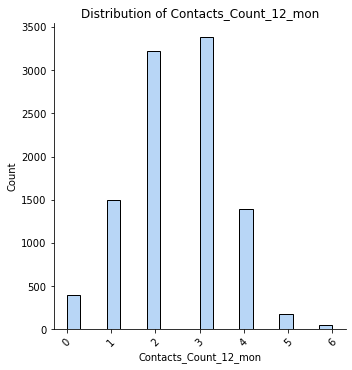

In [ ]:
plot_dist_features('Contacts_Count_12_mon')

- Similar to normal distribution. 

<Figure size 864x504 with 0 Axes>

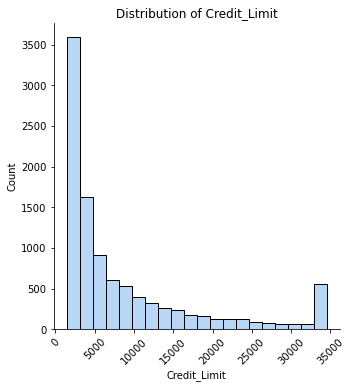

In [ ]:
plot_dist_features('Credit_Limit')

- Right-skewed, which is correct to assumption.
- Abnormal value at 35000. 

<Figure size 864x504 with 0 Axes>

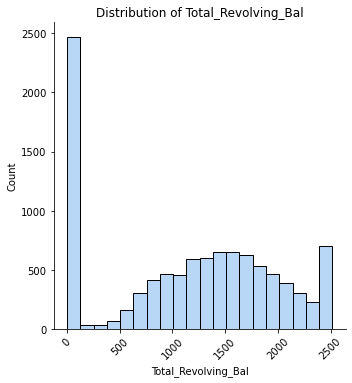

In [ ]:
plot_dist_features('Total_Revolving_Bal')

- Most people pay their bills on time.
- For people who don't pay their bills on time, the distribution follows a normal distribution.
- How people with different dependants and credit card types pay their bills? 
- There are a lot of revolving balance at 25000, which means there are a lot of people who have the same credit card level that tends to not pay when they are 2500 in debt? 

<Figure size 864x504 with 0 Axes>

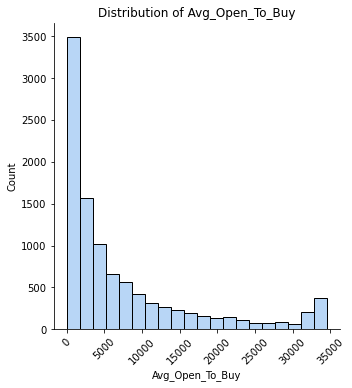

In [ ]:
plot_dist_features('Avg_Open_To_Buy')

- This is heavily right-skewed.
- Same pattern with Credit card limit and total revolving balance, the end of the spectrum have a tendency to increase in count.
- Most people used up their credit card and pay for it on time. 


<Figure size 864x504 with 0 Axes>

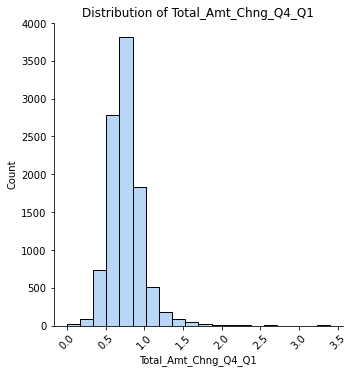

In [ ]:
plot_dist_features('Total_Amt_Chng_Q4_Q1')

- Follows a normal distribution. 
- Has a right tail. 
- Not much change with this the total amount of transactions. Which means people usually used up their credit card, and majority of them have the same credit card level.

<Figure size 864x504 with 0 Axes>

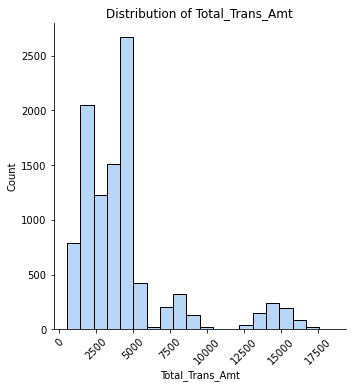

In [ ]:
plot_dist_features('Total_Trans_Amt')

- Trimodel distribution
- This might have a high correlation with credit card type.

<Figure size 864x504 with 0 Axes>

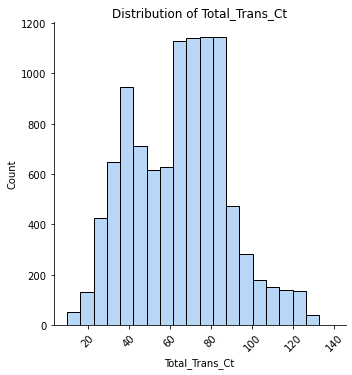

In [ ]:
plot_dist_features('Total_Trans_Ct')

- Not a clear distribution that it follows.

<Figure size 864x504 with 0 Axes>

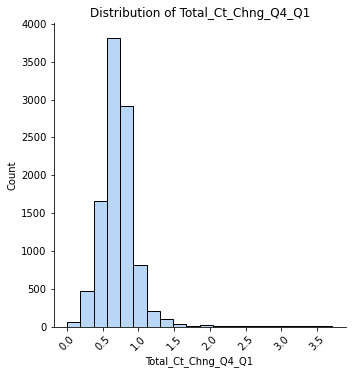

In [ ]:
plot_dist_features('Total_Ct_Chng_Q4_Q1')

- Has a right tail.
- Number of total transactions made each month seems consistent, maybe they only use their credit card as a habit, paying for specific places, for specific things each month, but this has to be stuff that are essential, has to be purchased each month. (?)

<Figure size 864x504 with 0 Axes>

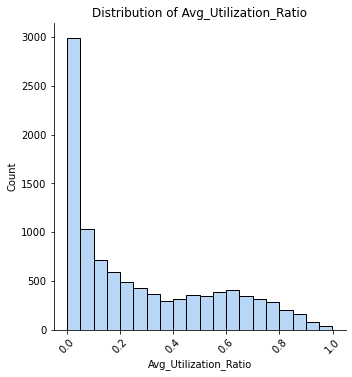

In [ ]:
plot_dist_features('Avg_Utilization_Ratio')

- This show how well people managing their account.
- Most people do not owe money. (Same POV as stated above)

### Correlation Analysis

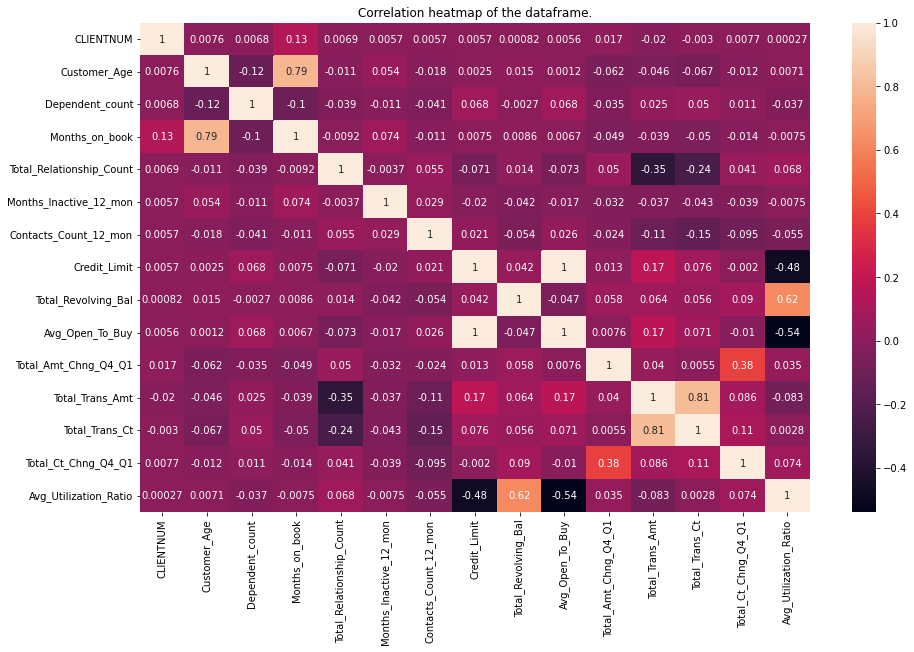

In [ ]:
def plot_correlation_heatmap(data):
    fig = plt.figure(figsize=(15,9))
    ax = fig.add_axes()
    sns.heatmap(data.corr(),ax = ax, annot=True)
    plt.title('Correlation heatmap of the dataframe.')
    # plt.savefig(r'F:\corr.png', transparent = True)

plot_correlation_heatmap(data=data)

- Avg_Open_To_Buy and Credit_Limit is 1, seems logical since the more credit card limit people have, the more is available at the end of the month. But people usually used up the credit card limit => people with higher credit card limit won't use up their credit card and only people with lower level card use up theirs. 
- The older the customer, the more likely that they will stay long term with a service (?). Or maybe they just lived for a longer time. 
- Credit Limit and Total Revolving Balance have high correlation with Avg_Utilization_Ratio because it is involved in the formula of calculating Avg_Utilization_Ratio.

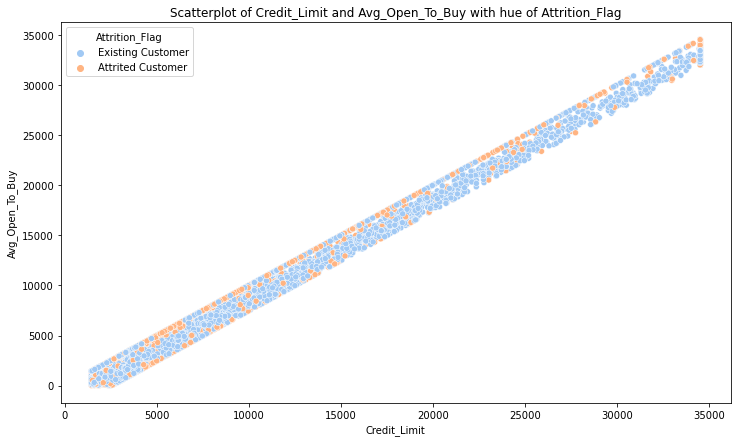

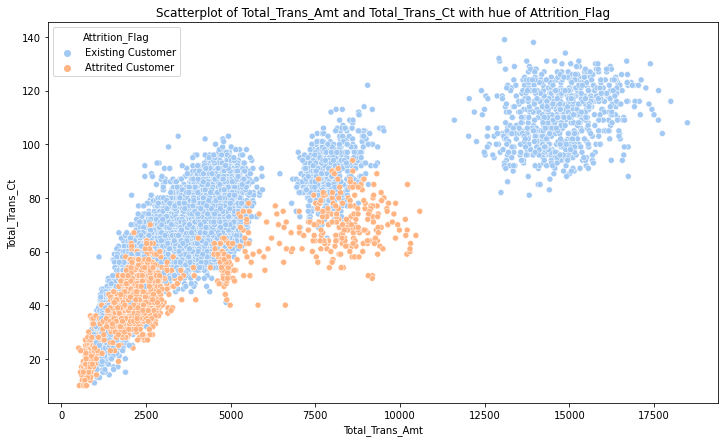

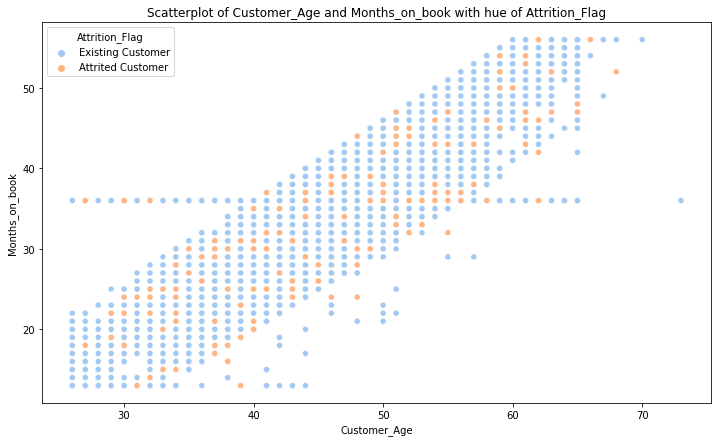

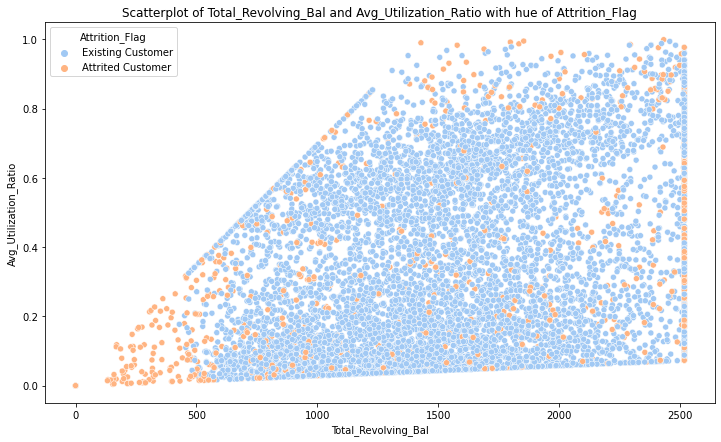

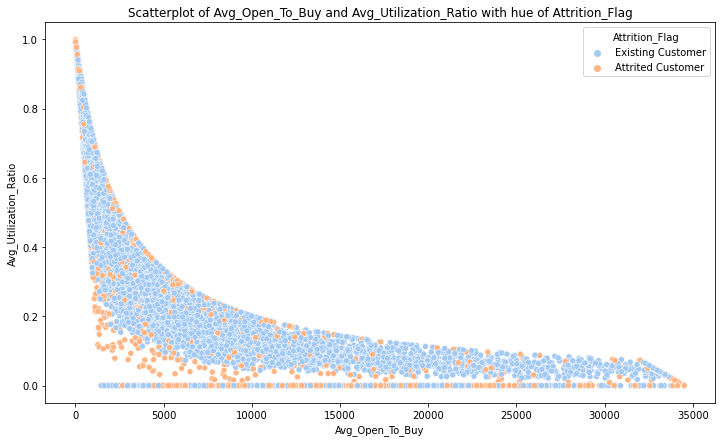

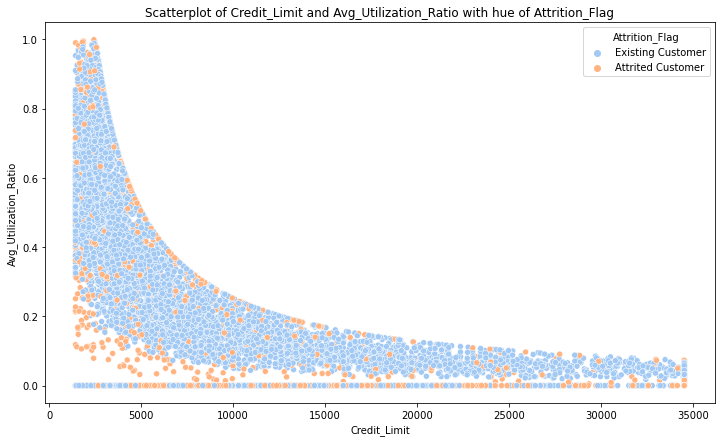

In [ ]:
for i1,i2 in get_top_abs_correlations(data,6).index:
    pair_plot_to_attritionflag(i1,i2)

- Attrited customers usually make less transactions (and transfer less amount of money).
- Attrited customers have low total revolving balance and also low utilization rate.
- The older the customers, the more months they have been using the service. 
- The higher the utilization rate, the less credit they have open to buy. 

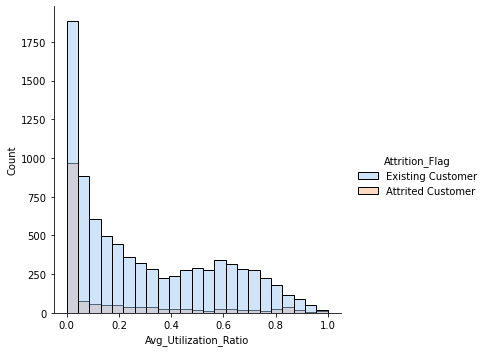

In [ ]:
sns.displot(x = 'Avg_Utilization_Ratio', data=data, hue='Attrition_Flag')

### Checking assumptions:

#### Assumption 1: People seems inactive is likely to churn.
We should use features like 'Months_Inactive_12_mon','Contacts_Count_12_mon','Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt','Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1':

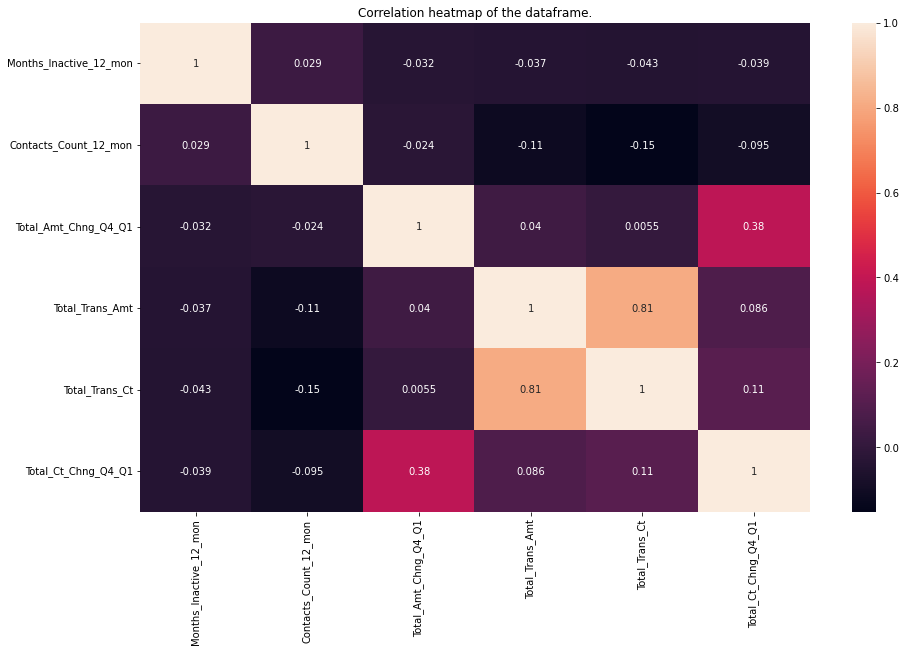

In [ ]:
plot_correlation_heatmap(data[['Months_Inactive_12_mon','Contacts_Count_12_mon','Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt','Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1']])

- Number of contacts made doesn't ensure customers' activeness.

<Figure size 864x504 with 0 Axes>

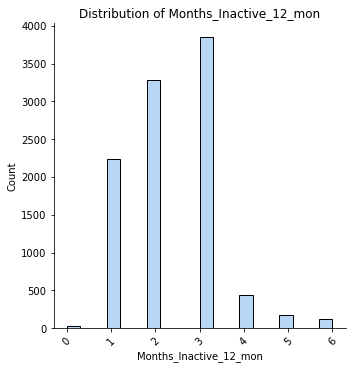

In [ ]:
plot_dist_features('Months_Inactive_12_mon')

<Figure size 864x504 with 0 Axes>

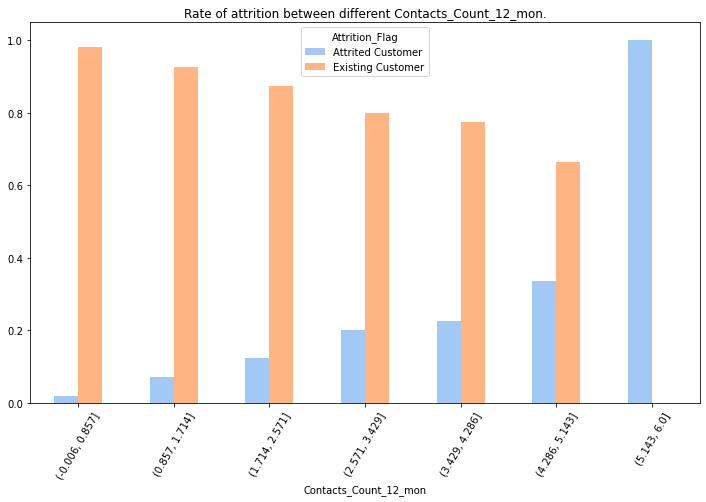

In [ ]:
plot_binned_category('Contacts_Count_12_mon',7)

The more contact the customer made, the more higher percentage of attrition the customer have.

There seems to be a connection. Existing customers usually have high total transaction count change and high transaction amount change. This means that they only use their credit card on certain occasions, not on a recurring basis. 

They dont use it often, so they automatically are good at managing their debt, which makes them less dependent of credit cards. 

### Assumption 2: Demographic features will have a big impact on attrition rate. (This will also test the tree model feature selection accuracy.)
- The older the person, the less likely the person will churn.
- Female churn more than male. 
- More dependent the person, the more likely the person will churn. 
- Higher the income category, the more likely the person will churn.
- Marriage won't affect churn rate.


<Figure size 864x504 with 0 Axes>

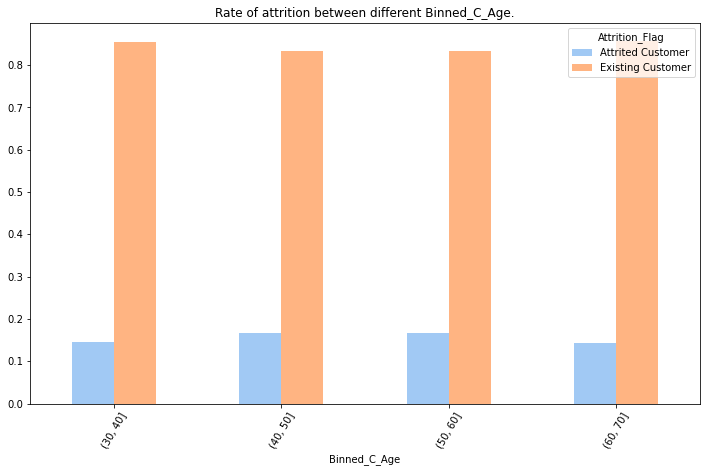

In [ ]:
plot_ratio_attrition_rate('Binned_C_Age')

Age doesnt seem to have much affect on attrition rate.
All age range have a similar ratio. This does not suggest any trends.

<Figure size 864x504 with 0 Axes>

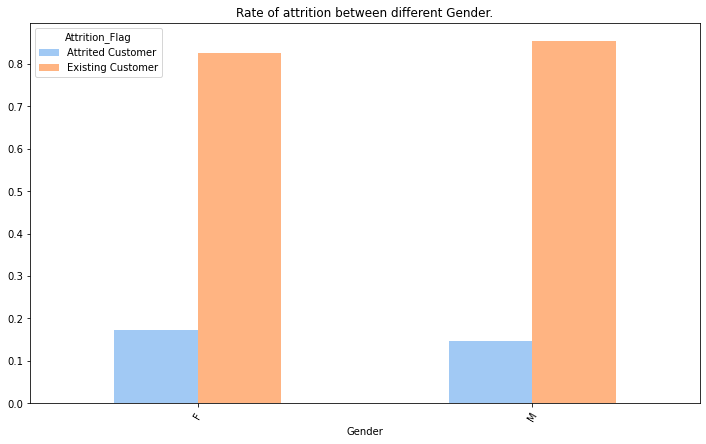

In [ ]:
plot_ratio_attrition_rate('Gender')

Male attrite slightly less than woman. In order to know whether this finding is significant, we have to perform hypothesis testing.

<Figure size 864x504 with 0 Axes>

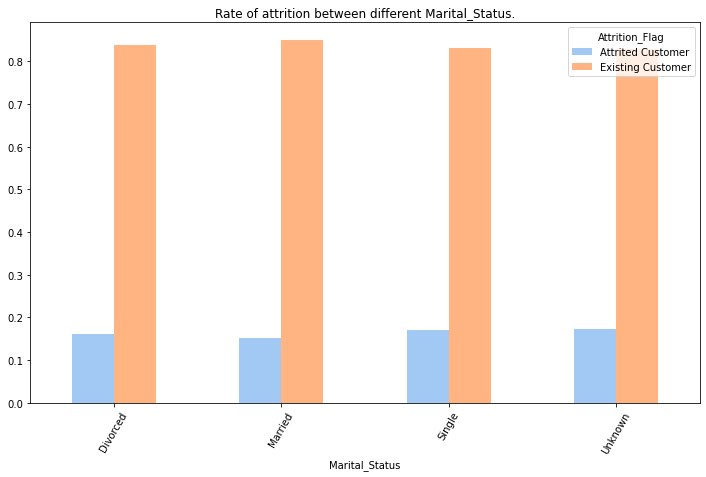

In [ ]:
plot_ratio_attrition_rate('Marital_Status')

<Figure size 864x504 with 0 Axes>

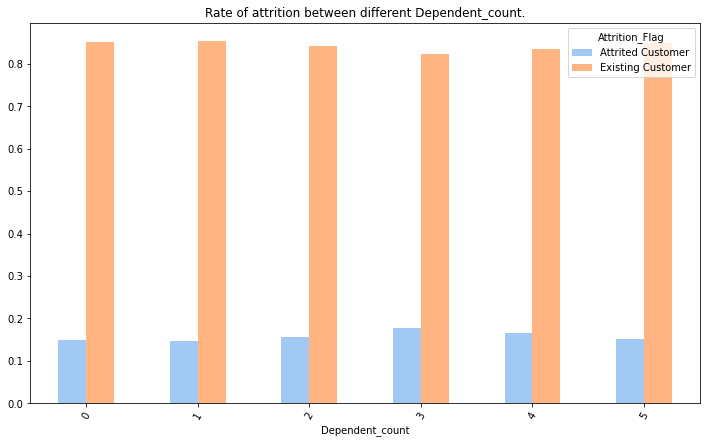

In [ ]:
plot_ratio_attrition_rate('Dependent_count')

<Figure size 864x504 with 0 Axes>

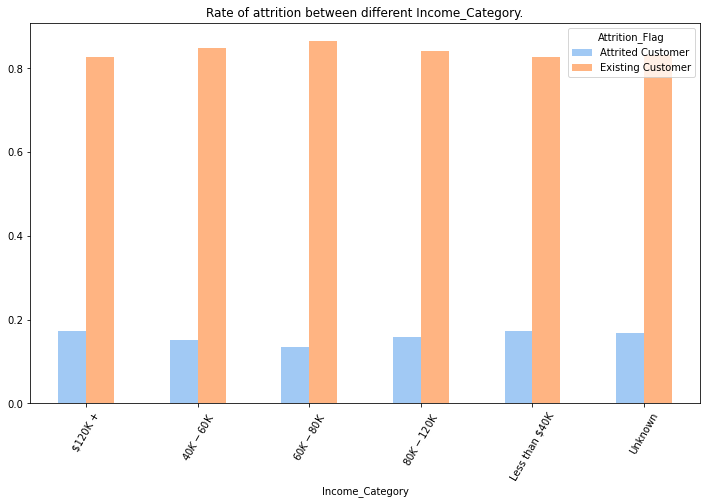

In [ ]:
plot_ratio_attrition_rate('Income_Category')

<Figure size 864x504 with 0 Axes>

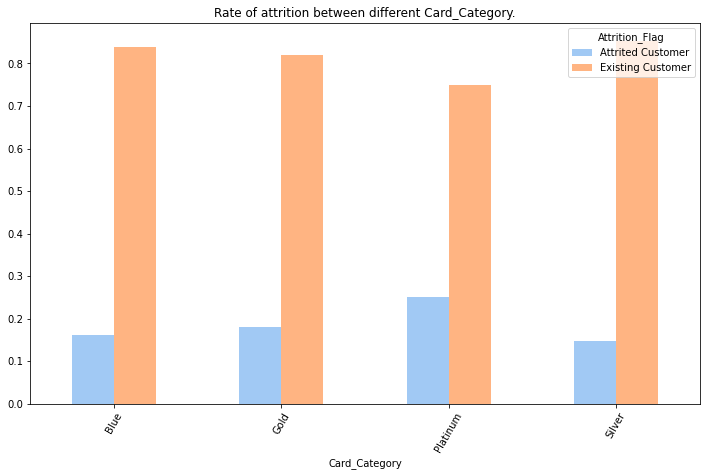

In [ ]:
plot_ratio_attrition_rate('Card_Category')

Platinum customers have the highest attrition rate, but since there are only 20 platinum credit card owners in the data set, this information can't have much weight. 

- These demographic traits do not really show the difference between attrited customers and loyal customers: attrited and non attrited customers follow the same distribution.
- The feature importance resulted from the tree model seems accurate and can help boost the speed in finding insights.

#### Assumption 3: Churning might be because of lack of debt managing ability from the customer (Avg_Utilization_Ratio, Total revolving balance).


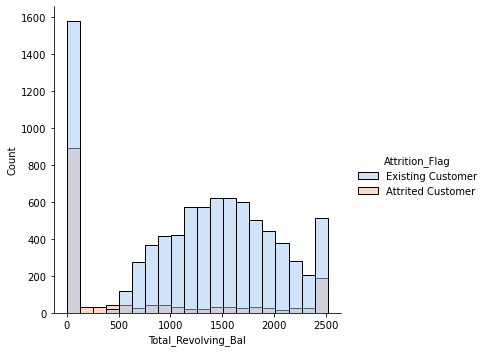

In [ ]:
sns.displot(x = 'Total_Revolving_Bal', data=data, hue='Attrition_Flag',kind='hist')

<Figure size 864x504 with 0 Axes>

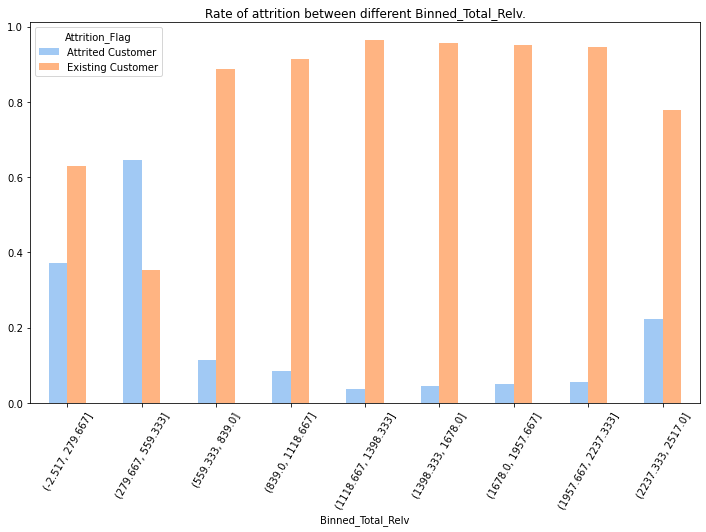

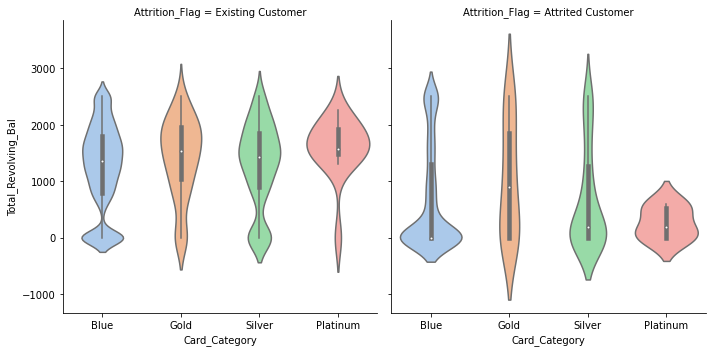

In [ ]:
data['Binned_Total_Relv'] = pd.cut(data['Total_Revolving_Bal'],bins=9)
plot_ratio_attrition_rate('Binned_Total_Relv')
sns.catplot(x='Card_Category',y='Total_Revolving_Bal',col='Attrition_Flag',data=data,kind='violin')

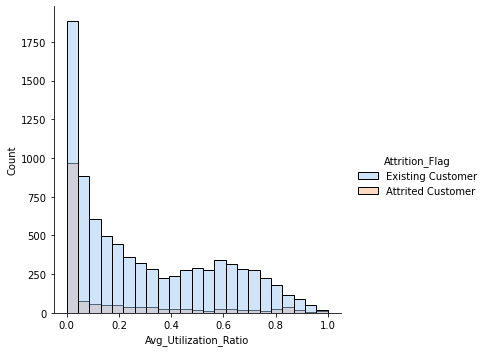

In [ ]:
sns.displot(x = 'Avg_Utilization_Ratio', data=data, hue='Attrition_Flag',kind='hist')

<Figure size 864x504 with 0 Axes>

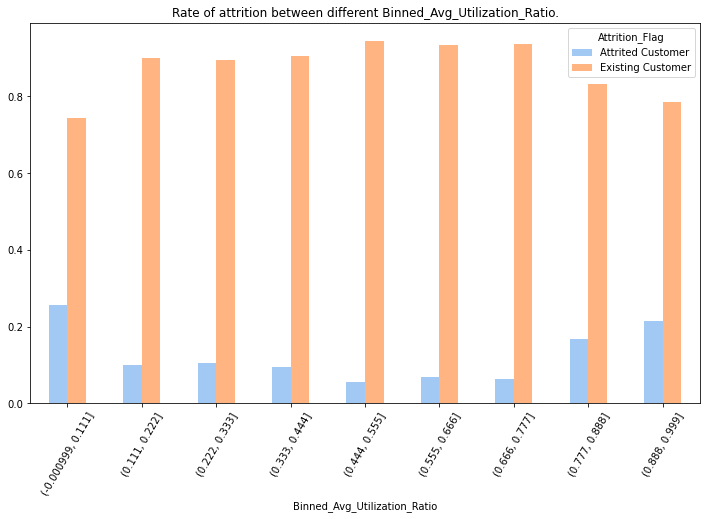

In [ ]:
data['Binned_Avg_Utilization_Ratio'] = pd.cut(data['Avg_Utilization_Ratio'],bins=9)
plot_ratio_attrition_rate('Binned_Avg_Utilization_Ratio')

There is a trend that shows that people who utilize their credit card at both ends of the extreme has a tendency to churn. 
- For people at the low extreme, maybe customers do not find many value in owning a credit card/ the service is lacking/... and therefore attrited.
- For people at the high extreme, maybe customers can find a way to manage their debt properly, therefore attrited.
- For people who use utilize their card at the rate of 0.44 - 0.66, debt is an indicator of card usage of customers.

Can we find an optimum average utilization ratio to that keeps customers from churning? 

#### Assumption 4: The higher the attachment with the credit card issuer, the less likely the customer will churn. Related variables are: 'Months_on_book', 'Total_Relationship_Count', 'Contacts_Count_12_mon'

<Figure size 864x504 with 0 Axes>

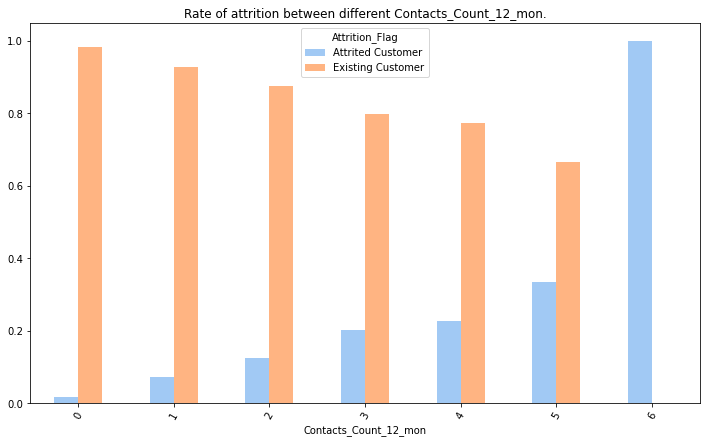

In [ ]:
plot_ratio_attrition_rate('Contacts_Count_12_mon')

The more contacts customers made, the more likely the customer will churn.

<Figure size 864x504 with 0 Axes>

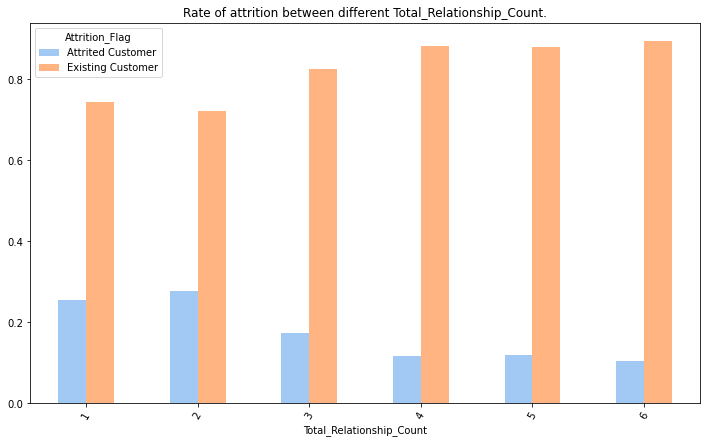

In [ ]:
plot_ratio_attrition_rate('Total_Relationship_Count')

The more services the customer subscribe to, the less likely they will churn. 

#### Assumption 5: Changes in transaction will notice whether the customer will churn or not.
Related variables to check:
- Total_Amt_Chng_Q4_Q1
- Total_Trans_Amt
- Total_Trans_Ct
- Total_Ct_Chng_Q4_Q1

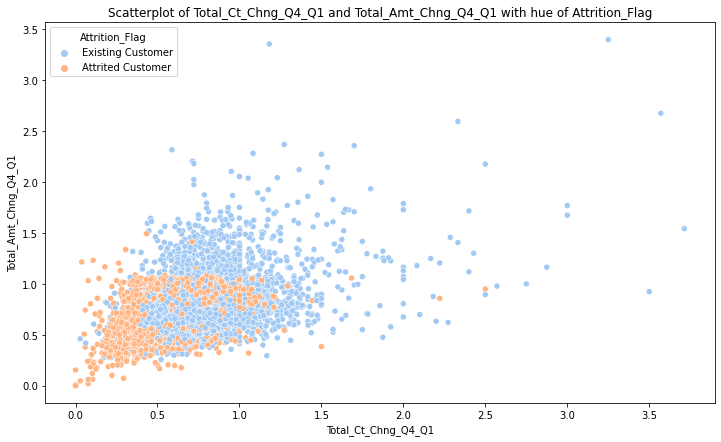

In [ ]:
pair_plot_to_attritionflag('Total_Ct_Chng_Q4_Q1','Total_Amt_Chng_Q4_Q1',data=data)

<Figure size 864x504 with 0 Axes>

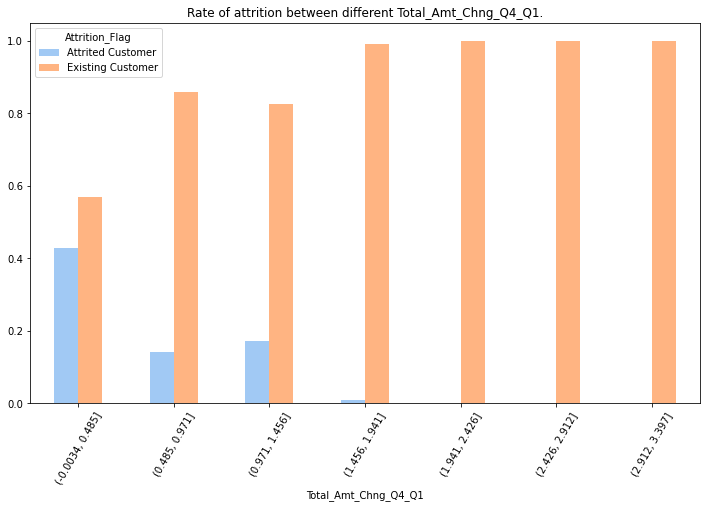

In [ ]:
plot_binned_category('Total_Amt_Chng_Q4_Q1',7)

<Figure size 864x504 with 0 Axes>

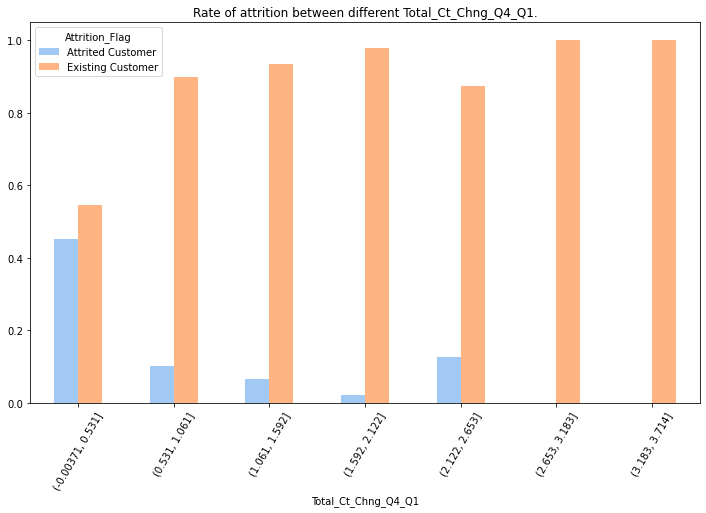

In [ ]:
plot_binned_category('Total_Ct_Chng_Q4_Q1',7)

Usually, attrited customers usually change very little in amount of transactions or amount of money transferred per transaction. Maybe it's because they do not use the credit card that often to have significant changes compare to non-attrited customers. 

<Figure size 864x504 with 0 Axes>

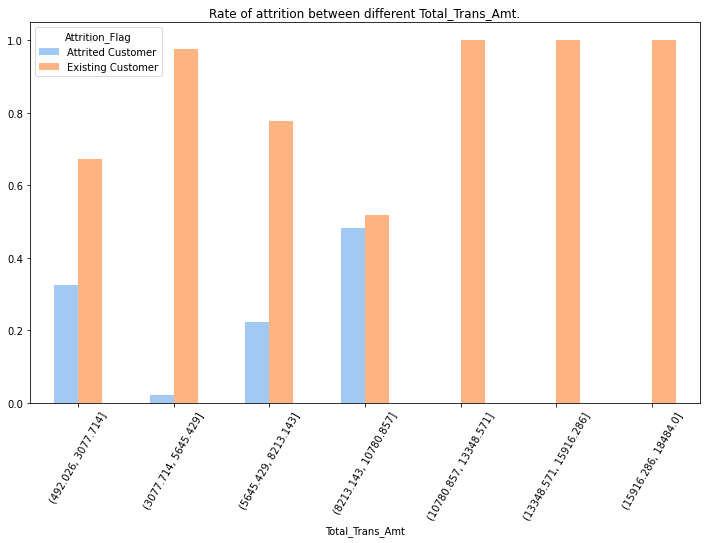

In [ ]:
plot_binned_category('Total_Trans_Amt',7)

<Figure size 864x504 with 0 Axes>

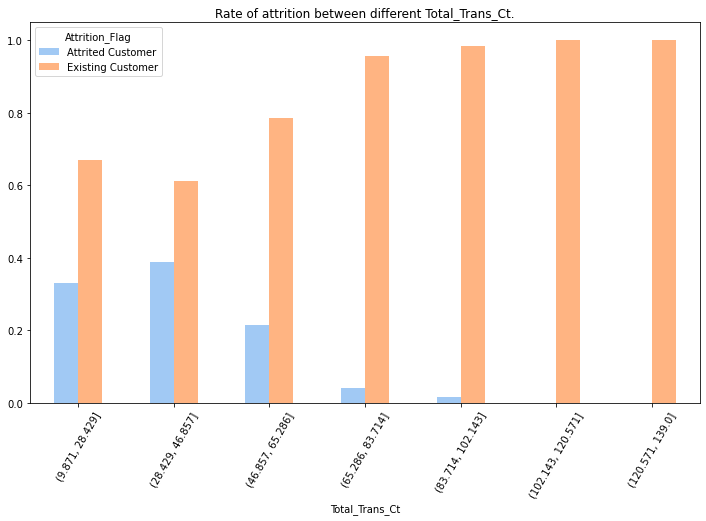

In [ ]:
plot_binned_category('Total_Trans_Ct',7)

### Data assumptions: 
- People who seems inactive is likely to churn. (Not really, but people who make more contact seems to have higher percentage of attrition)
- Some demographic informations is more likely to churn. (How well do people manage their account?) (Graphs show no indications.)
- Churning might be because of lack of debt managing ability from the customer (Avg_Utilization_Ratio). (True) 
- The higher the attachment with the credit card issuer, the less likely the customer will churn. (More contacts signal attrition, more relationship count show loyalty.)
- (Transaction amount changed in a year span) might be the indicator of attrition. (People who have high stability of changes in transactions (transactions made/ amount of money transferred changed in Q1 to Q4) attrite more. The lack of credit card usage might be accounted for this.)
- People with higher card category usualy has higher average total transaction amount (spend more). (True)
- High number of dependent makes people use their credit card more(more transaction/ more amount spent on transactions.) (False)
- Total revolving balance helps to predict whether customer will attrite or not. (Tree induction shows this.)



### Feature Importance from Random Forest Classifier.

In [253]:
from sklearn.ensemble import RandomForestClassifier

data_prep = data.copy()
data_prep = data_prep.drop(['Binned_C_Age','Binned_C_Age'],axis=1)
data_prep.drop(['CLIENTNUM'], axis=1, inplace=True)
data_prep['Attrition_Flag'] = data_prep['Attrition_Flag'].map({'Existing Customer':0,'Attrited Customer':1 })
data_prep['Gender'] = data_prep['Gender'].map({'F':0,'M':1 }) 
data_prep['Education_Level'] = pd.get_dummies(data_prep['Education_Level'],dummy_na=True)
data_prep['Marital_Status'] = pd.get_dummies(data_prep['Marital_Status'],dummy_na=True)
data_prep['Card_Category'] = data_prep['Card_Category'].map({'Blue':1,'Silver':2,'Gold':3,'Platinum':4})
data_prep['Income_Category'] = data_prep['Income_Category'].map({'Less than $40K':0 ,'$40K - $60K':1, '$80K - $120K':2,'$60K - $80K':3,'$120K +':4, 'Unknown':-1})

y_train = data_prep["Attrition_Flag"]
X_train = data_prep.drop(['Attrition_Flag'],axis=1)

forest = RandomForestClassifier(random_state=0)
forest.fit(X_train,y_train)
feature_importance = pd.DataFrame({'Name':X_train.columns, 'Value':forest.feature_importances_})
feature_importance.sort_values('Value',ascending=False).reset_index(drop=True)

,Name,Value
0,Total_Trans_Amt,0.202958
1,Total_Trans_Ct,0.167874
2,Total_Revolving_Bal,0.110947
3,Total_Ct_Chng_Q4_Q1,0.104259
4,Total_Relationship_Count,0.068539
5,Avg_Utilization_Ratio,0.063849
6,Total_Amt_Chng_Q4_Q1,0.063288
7,Customer_Age,0.034063
8,Credit_Limit,0.033407
9,Avg_Open_To_Buy,0.031771


Feature importance based on impurity from a random forest classifier model suggests the above results:
- Total transactions amount will identify the customers will attrite or not. 
- Total revolving balance also shows that people are likely to have debt or not. 
- Features related to personal information (like marital status, gender, dependent count,...) do not have much impact on attrition rate.

### Conclusion: 
- Demographic features do not have much impact on the attrition of the client.
- Features about credit card usage impact attrition rate.